In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.sum()

age         16473.0
sex           207.0
cp            293.0
trtbps      39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalachh    45343.0
exng           99.0
oldpeak       315.0
slp           424.0
caa           221.0
thall         701.0
output        165.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
#there is no need for preprocessing

EDA

In [9]:
df.iloc[:,-1].value_counts()

1    165
0    138
Name: output, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

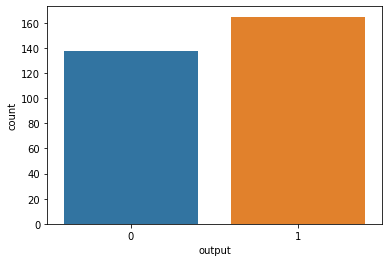

In [10]:
sns.countplot("output",data=df)

In [ ]:
#the number of people have suffered a heart attack are more

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

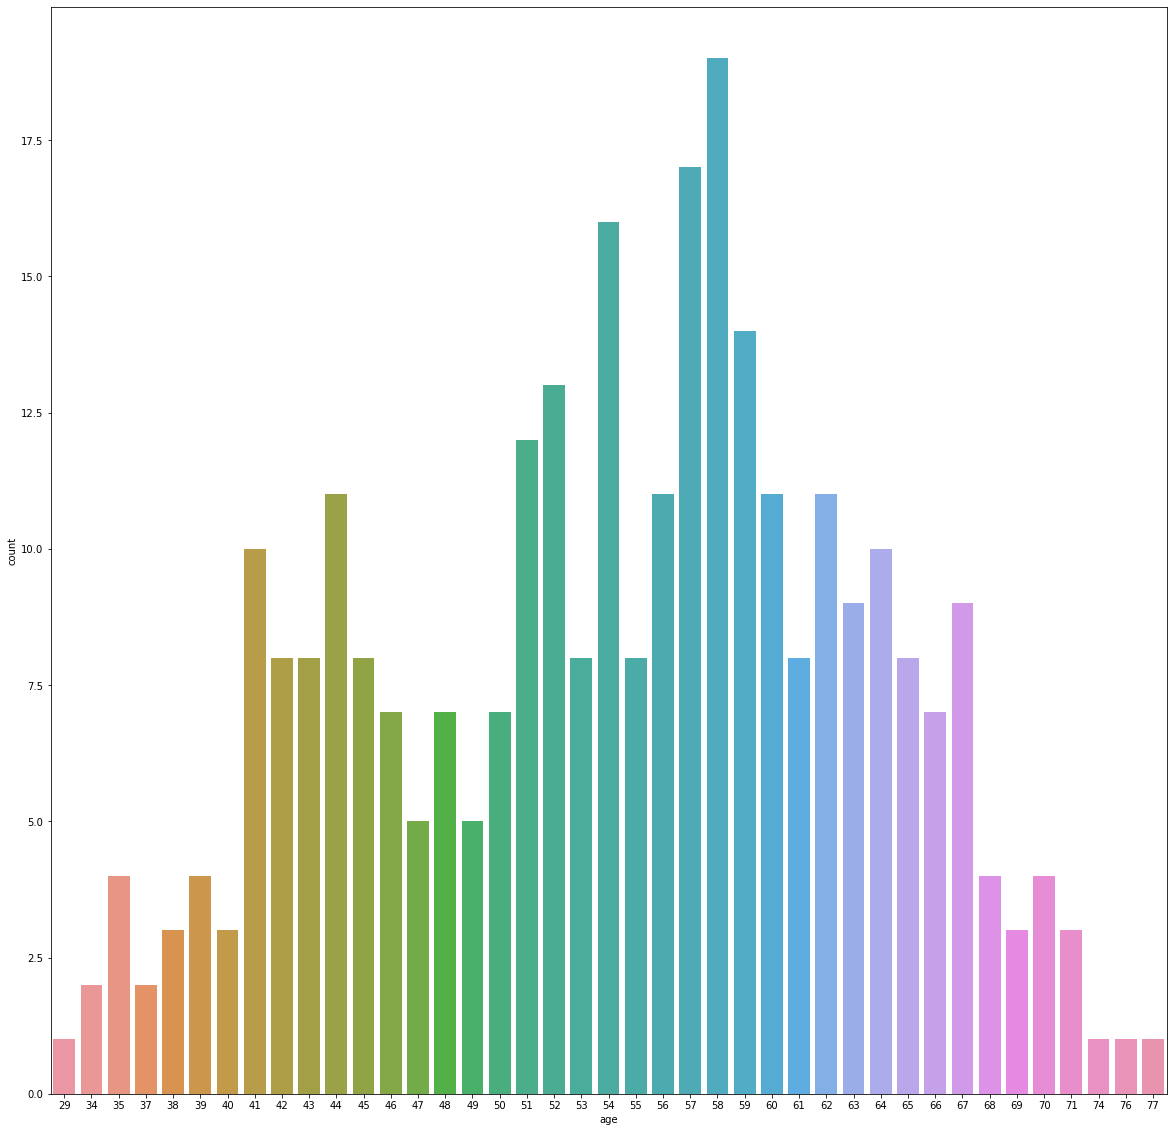

In [12]:
plt.figure(figsize=(20,20))
sns.countplot("age",data=df)

In [ ]:
#people between the age of 50 to 60 are more

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

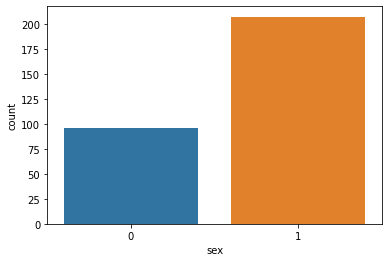

In [13]:
sns.countplot("sex",data=df)

In [ ]:
#there are more number of males

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

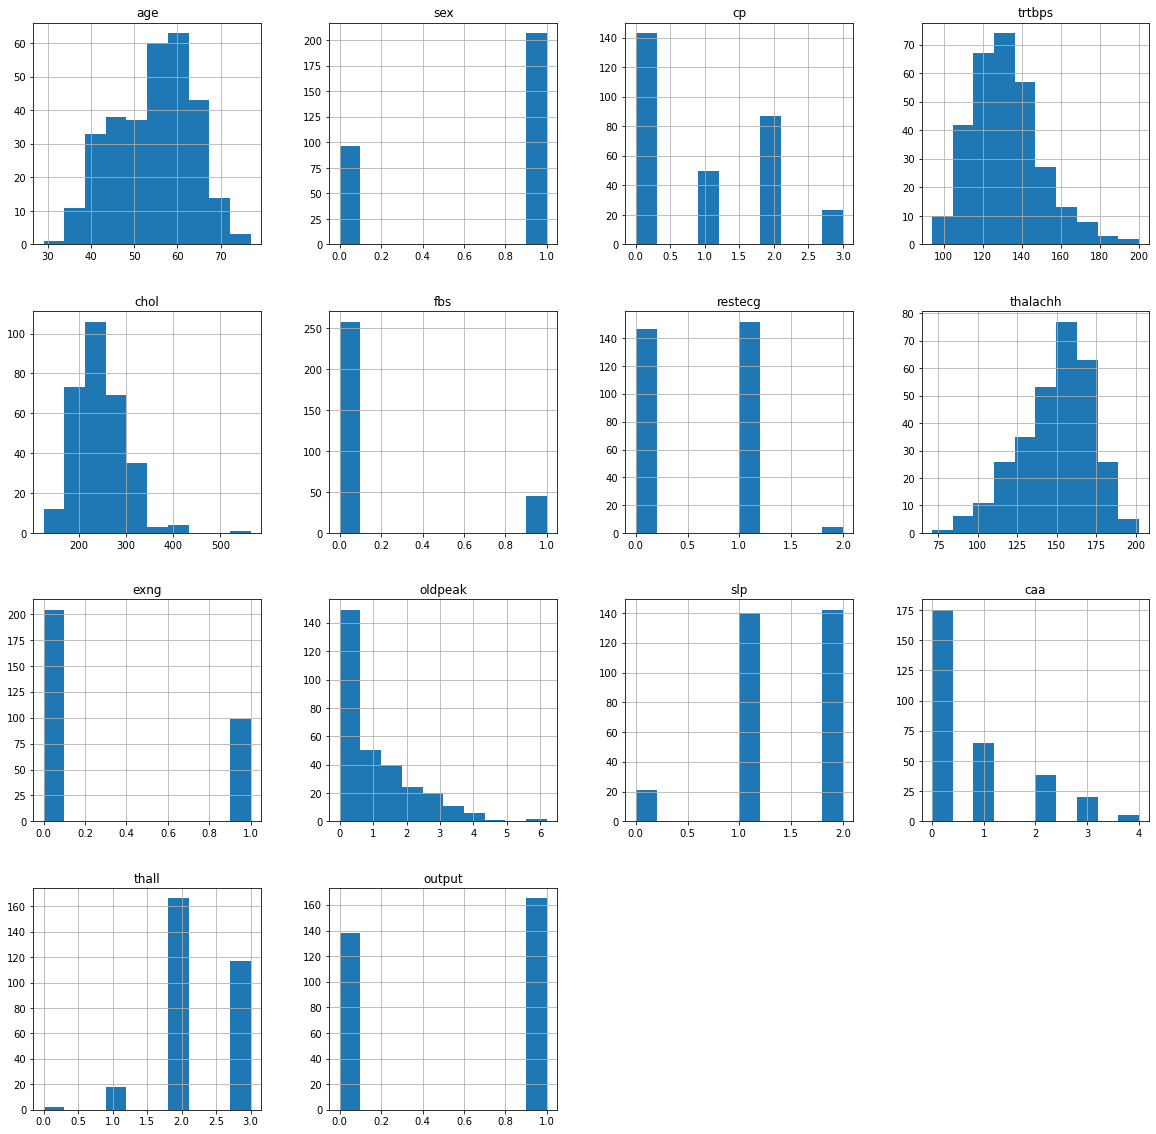

In [14]:
df.hist(figsize=(20,20))

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='output', ylabel='Density'>

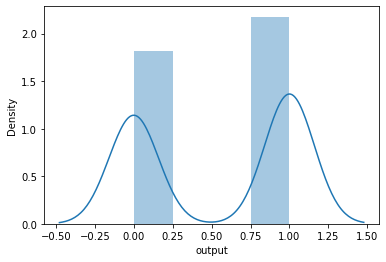

In [18]:
sns.distplot(df["output"])

<AxesSubplot:>

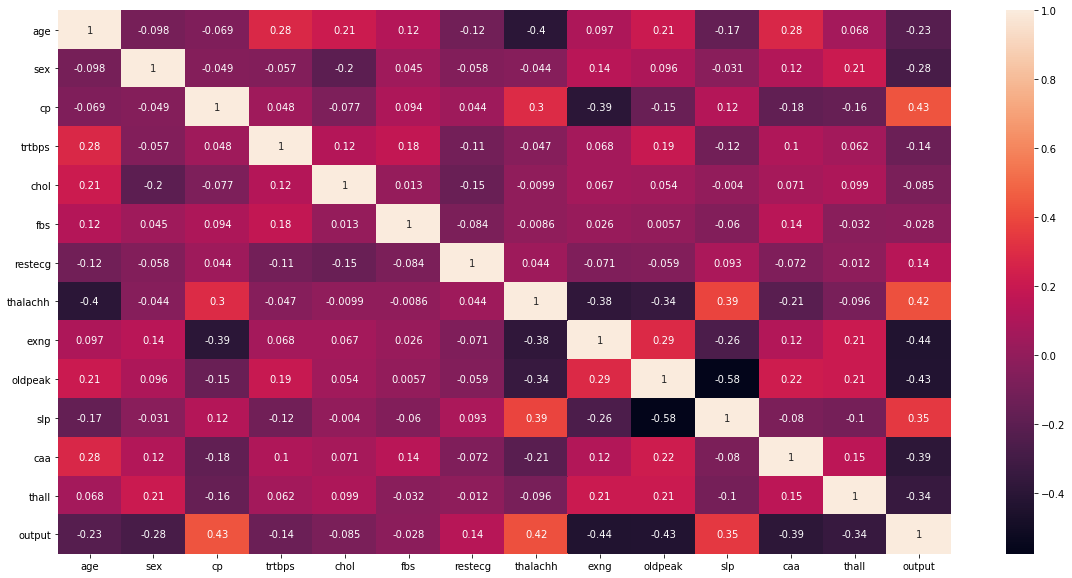

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
x=df.iloc[:,0:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

FEATURE SCALING

In [24]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

OVER SAMPLING

In [25]:
print("before oversampleing label=1:",sum(ytrain==1))
print("before oversampling label=0:",sum(ytrain==0))

before oversampleing label=1: 134
before oversampling label=0: 108


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
sm=SMOTE(random_state=2)

In [28]:
xtrain2,ytrain2=sm.fit_resample(xtrain,ytrain.ravel())

In [29]:
print("after oversampleing label=1:",sum(ytrain2==1))
print("after oversampling label=0:",sum(ytrain2==0))

after oversampleing label=1: 134
after oversampling label=0: 134


MODEL BUILDING

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

LOGISTIC REGRESSION

In [31]:
lr=LogisticRegression()
lr.fit(xtrain2,ytrain2)

LogisticRegression()

In [32]:
parameters_lr={"C":[0.0006,0.0007,0.0008]}

In [33]:
gr_lr=GridSearchCV(lr,param_grid=parameters_lr,scoring="accuracy",cv=5)

In [34]:
gr_lr.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0006, 0.0007, 0.0008]}, scoring='accuracy')

In [35]:
lr2=gr_lr.best_estimator_
lr2

LogisticRegression(C=0.0006)

In [36]:
pred_lr=lr2.predict(xtrain2)
pred2_lr=lr2.predict(xtest)

In [37]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_lr)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_lr)*100)
print("precision score of train data:",precision_score(ytrain2,pred_lr)*100)
print("precision score of test data:", precision_score(ytest,pred2_lr)*100)
print("recall score of train data:",recall_score(ytrain2,pred_lr)*100)
print("recall score of test data:",recall_score(ytest,pred2_lr)*100)

accuracy score of train data: 83.2089552238806
accuracy score of test data: 78.68852459016394
precision score of train data: 79.08496732026144
precision score of test data: 75.0
recall score of train data: 90.29850746268657
recall score of test data: 87.09677419354838


In [38]:
confusion_matrix(ytrain2,pred_lr)

array([[102,  32],
       [ 13, 121]], dtype=int64)

In [39]:
confusion_matrix(ytest,pred2_lr)

array([[21,  9],
       [ 4, 27]], dtype=int64)

DECISION TREE CLASSIFIER

In [40]:
dt=DecisionTreeClassifier()
dt.fit(xtrain2,ytrain2)

DecisionTreeClassifier()

In [41]:
parameters_dt={"max_depth":[3,4,5,6,7,8,9,10]}

In [42]:
gr=GridSearchCV(dt,param_grid=parameters_dt,scoring="accuracy",cv=5)

In [43]:
gr.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [44]:
dt2=gr.best_estimator_

In [45]:
pred_dt=dt2.predict(xtrain2)
pred2_dt=dt2.predict(xtest)

In [46]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_dt)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_dt)*100)
print("precision score of train data:",precision_score(ytrain2,pred_dt)*100)
print("precision score of test data:", precision_score(ytest,pred2_dt)*100)
print("recall score of train data:",recall_score(ytrain2,pred_dt)*100)
print("recall score of test data:",recall_score(ytest,pred2_dt)*100)

accuracy score of train data: 86.94029850746269
accuracy score of test data: 70.49180327868852
precision score of train data: 90.2439024390244
precision score of test data: 69.6969696969697
recall score of train data: 82.83582089552239
recall score of test data: 74.19354838709677


In [47]:
confusion_matrix(ytrain2,pred_dt)

array([[122,  12],
       [ 23, 111]], dtype=int64)

In [48]:
confusion_matrix(ytest,pred2_dt)

array([[20, 10],
       [ 8, 23]], dtype=int64)

RANDOM FOREST CLASSIFIER

In [49]:
rf=RandomForestClassifier()
rf.fit(xtrain2,ytrain2)

RandomForestClassifier()

In [50]:
parameters_rf={"n_estimators":[100,200,300],"max_depth":[3,4,5,6,7,8,9,10]}

In [51]:
gr_rf=GridSearchCV(rf,param_grid=parameters_rf,scoring="accuracy",cv=5)

In [52]:
gr_rf.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [53]:
rf2=gr_rf.best_estimator_

In [54]:
pred_rf=rf2.predict(xtrain2)
pred2_rf=rf2.predict(xtest)

In [55]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_rf)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_rf)*100)
print("precision score of train data:",precision_score(ytrain2,pred_rf)*100)
print("precision score of test data:", precision_score(ytest,pred2_rf)*100)
print("recall score of train data:",recall_score(ytrain2,pred_rf)*100)
print("recall score of test data:",recall_score(ytest,pred2_rf)*100)

accuracy score of train data: 99.6268656716418
accuracy score of test data: 75.40983606557377
precision score of train data: 99.25925925925925
precision score of test data: 73.52941176470588
recall score of train data: 100.0
recall score of test data: 80.64516129032258


In [56]:
confusion_matrix(ytrain2,pred_rf)

array([[133,   1],
       [  0, 134]], dtype=int64)

In [57]:
confusion_matrix(ytest,pred2_rf)

array([[21,  9],
       [ 6, 25]], dtype=int64)

KNN

In [58]:
knn=KNeighborsClassifier()
knn.fit(xtrain2,ytrain2)

KNeighborsClassifier()

In [59]:
parameters_knn={"n_neighbors":[5,6,7,8,9,10,11,12,13,14,15]}

In [60]:
gr_knn=GridSearchCV(knn,param_grid=parameters_knn,scoring="accuracy",cv=5)

In [61]:
gr_knn.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             scoring='accuracy')

In [62]:
knn2=gr_knn.best_estimator_

In [63]:
pred_knn=knn2.predict(xtrain2)
pred2_knn=knn2.predict(xtest)

In [64]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_knn)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_knn)*100)
print("precision score of train data:",precision_score(ytrain2,pred_knn)*100)
print("precision score of test data:", precision_score(ytest,pred2_knn)*100)
print("recall score of train data:",recall_score(ytrain2,pred_knn)*100)
print("recall score of test data:",recall_score(ytest,pred2_knn)*100)

accuracy score of train data: 87.68656716417911
accuracy score of test data: 77.04918032786885
precision score of train data: 87.96992481203007
precision score of test data: 75.75757575757575
recall score of train data: 87.31343283582089
recall score of test data: 80.64516129032258


In [65]:
confusion_matrix(ytrain2,pred_knn)

array([[118,  16],
       [ 17, 117]], dtype=int64)

In [66]:
confusion_matrix(ytest,pred2_knn)

array([[22,  8],
       [ 6, 25]], dtype=int64)

SVC

In [67]:
svc=SVC()
svc.fit(xtrain2,ytrain2)

SVC()

In [68]:
parameters_svc={"kernel":['linear','poly','rbf','sigmoid']}

In [69]:
gr_svc=GridSearchCV(svc,param_grid=parameters_svc,scoring="accuracy",cv=5)

In [70]:
gr_svc.fit(xtrain2,ytrain2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [74]:
svc2=gr_svc.best_estimator_
svc2

SVC()

In [75]:
pred_svc=svc2.predict(xtrain2)
pred2_svc=svc2.predict(xtest)

In [76]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_svc)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_svc)*100)
print("precision score of train data:",precision_score(ytrain2,pred_svc)*100)
print("precision score of test data:", precision_score(ytest,pred2_svc)*100)
print("recall score of train data:",recall_score(ytrain2,pred_svc)*100)
print("recall score of test data:",recall_score(ytest,pred2_svc)*100)

accuracy score of train data: 95.1492537313433
accuracy score of test data: 72.1311475409836
precision score of train data: 95.48872180451127
precision score of test data: 71.875
recall score of train data: 94.77611940298507
recall score of test data: 74.19354838709677


In [77]:
confusion_matrix(ytrain2,pred_svc)

array([[128,   6],
       [  7, 127]], dtype=int64)

In [78]:
confusion_matrix(ytest,pred2_svc)

array([[21,  9],
       [ 8, 23]], dtype=int64)

XGBOOST

In [79]:
xg=xgb.XGBClassifier(use_label_encoder=False)
xg.fit(xtrain2,ytrain2)

[16:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [80]:
parameters_xg={"max_depth":[3,4,5,6,7,8,9,10],"n_estimators=100":[100,200,300]}

In [81]:
gr_xg=GridSearchCV(xg,param_grid=parameters_xg,scoring="accuracy",cv=5)

In [82]:
gr_xg.fit(xtrain2,ytrain2)

[16:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete


[16:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t


[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t


[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

[16:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[16:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[16:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

[16:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete

[16:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some paramete


[16:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators=100" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                

In [83]:
xg2=gr_xg.best_estimator_
xg2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_estimators=100=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [84]:
pred_xg=xg2.predict(xtrain2)
pred2_xg=xg2.predict(xtest)

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [85]:
print("accuracy score of train data:",accuracy_score(ytrain2,pred_xg)*100)
print("accuracy score of test data:", accuracy_score(ytest,pred2_xg)*100)
print("precision score of train data:",precision_score(ytrain2,pred_xg)*100)
print("precision score of test data:", precision_score(ytest,pred2_xg)*100)
print("recall score of train data:",recall_score(ytrain2,pred_xg)*100)
print("recall score of test data:",recall_score(ytest,pred2_xg)*100)

accuracy score of train data: 100.0
accuracy score of test data: 72.1311475409836
precision score of train data: 100.0
precision score of test data: 70.58823529411765
recall score of train data: 100.0
recall score of test data: 77.41935483870968


In [86]:
confusion_matrix(ytrain2,pred_xg)

array([[134,   0],
       [  0, 134]], dtype=int64)

In [87]:
confusion_matrix(ytest,pred2_xg)

array([[20, 10],
       [ 7, 24]], dtype=int64)

COCLUSION:- Random Forest Classifier and XGBClassifier are giving the best results